# Q-Learning Implementation Lab

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ericmanley/S24-CS143AI/blob/main/q_learning_implementation_lab.ipynb)

In this lab, we're going to practice writing code to implement Q learning.

## Gridworld Problem

We defined the Gridworld problem in class. Here's a quick summary:

2 x 3 Grid

<table border="1">
    <tr><td>1</td><td>2</td><td>3</td></tr>
    <tr><td>3</td><td>4</td><td>5</td></tr>
</table>

**states:** agent located in one of the 6 boxes
* start in box 1
* goal is in box 6

**actions:** can move up, down, left, or right

**rewards:**
* -1 for moving into box 1-5
* -2 for trying to move to a non-existent box (e.g., “up” from box 1) 
* 10 for moving into box 6


## Implementing Gridworld

Let's start by creating lists for each of the possible states and actions

In [1]:
possible_states = [1,2,3,4,5,6]
possible_actions = ["U","D","L","R"]

We also need a way to look up the *next state* each state-action pair as well as the *reward* for each state-action pair. We'll just do it with nested dictionaries:

In [2]:
next_state_table = {
    1 : {
        "U" : 1,
        "D" : 4,
        "L" : 1,
        "R" : 2
    },
    2 : {
        "U" : 2,
        "D" : 5,
        "L" : 1,
        "R" : 3
    },
    3 : {
        "U" : 3,
        "D" : 6,
        "L" : 2,
        "R" : 3
    },
    4 : {
        "U" : 1,
        "D" : 4,
        "L" : 4,
        "R" : 5
    },
    5 : {
        "U" : 2,
        "D" : 5,
        "L" : 4,
        "R" : 6
    },
    6 : {
        "U" : 3,
        "D" : 6,
        "L" : 5,
        "R" : 6
    }
}


reward = {
    1 : {
        "U" : -2,
        "D" : -1,
        "L" : -2,
        "R" : -1
    },
    2 : {
        "U" : -2,
        "D" : -1,
        "L" : -1,
        "R" : -1
    },
    3 : {
        "U" : -2,
        "D" : 10,
        "L" : -1,
        "R" : -2
    },
    4 : {
        "U" : -1,
        "D" : -2,
        "L" : -2,
        "R" : -1
    },
    5 : {
        "U" : -1,
        "D" : -2,
        "L" : -1,
        "R" : 10
    },
    6 : {
        "U" : -1,
        "D" : -2,
        "L" : -1,
        "R" : -2
    }
}




display(next_state_table)
display(reward)


{1: {'U': 1, 'D': 4, 'L': 1, 'R': 2},
 2: {'U': 2, 'D': 5, 'L': 1, 'R': 3},
 3: {'U': 3, 'D': 6, 'L': 2, 'R': 3},
 4: {'U': 1, 'D': 4, 'L': 4, 'R': 5},
 5: {'U': 2, 'D': 5, 'L': 4, 'R': 6},
 6: {'U': 3, 'D': 6, 'L': 5, 'R': 6}}

{1: {'U': -2, 'D': -1, 'L': -2, 'R': -1},
 2: {'U': -2, 'D': -1, 'L': -1, 'R': -1},
 3: {'U': -2, 'D': 10, 'L': -1, 'R': -2},
 4: {'U': -1, 'D': -2, 'L': -2, 'R': -1},
 5: {'U': -1, 'D': -2, 'L': -1, 'R': 10},
 6: {'U': -1, 'D': -2, 'L': -1, 'R': -2}}

Example - let's say we were in state 3 and wanted to take the "down" action. We'd look up the next state we'd end up in like this

In [3]:
print( next_state_table[3]["D"] )

6


and the reward we'd get for that is

In [4]:
print( reward[3]["D"] )

10


## Creating the Q Table

Remember that the heart of Q-Learning is the update rule

$Q(state,action) \leftarrow Q(state,action) + \alpha[reward(state,action) + \gamma Q(next\_state,best\_next\_action) -  Q(state,action)  ]$

So we also need to represent Q as a table of state-action pairs. We can also do this with a nested dictionary. 

For each state, we'll create a dictionary and then loop through all possible actions and initialize the Q table to 0 for each action.

In [5]:
Q = {}

for s in possible_states:
    Q[s] = {}
    for a in possible_actions:
        Q[s][a] = 0
        
Q

{1: {'U': 0, 'D': 0, 'L': 0, 'R': 0},
 2: {'U': 0, 'D': 0, 'L': 0, 'R': 0},
 3: {'U': 0, 'D': 0, 'L': 0, 'R': 0},
 4: {'U': 0, 'D': 0, 'L': 0, 'R': 0},
 5: {'U': 0, 'D': 0, 'L': 0, 'R': 0},
 6: {'U': 0, 'D': 0, 'L': 0, 'R': 0}}

## Updating the Q Table

Now we can apply the update rule over and over again to learn better values for Q. 

In [6]:
import random

# we start in state 1
state = 1

# you can experiment with different values for alpha and gamma
alpha  = 0.1
gamma = 0.6


for _ in range(1000):
    
    # choose a random action
    action = random.choice(possible_actions) 
    
    # figure out the state we'll end up in after this action
    next_state = next_state_table[state][action]
    
    # find the best move we can make (according to the Q Table from the next state)
    next_state_Q_values_list = Q[next_state].values()
    next_state_best_Q = max( next_state_Q_values_list )
    
    # apply the Q-learning update rule
    Q[state][action] = Q[state][action] + alpha*(reward[state][action] + gamma*(next_state_best_Q  ) - Q[state][action])
    
    # if we reached the goal state, restart the scenario at the start state
    # otherwise, keep going from the next state
    if next_state == 6:
        state = 1
    else:
        state = next_state 
    
print("Here's what the Q Table looks like now:")
display(Q)

Here's what the Q Table looks like now:


{1: {'U': -0.9982620289105903,
  'D': 1.7915095277679143,
  'L': -1.0387215727018737,
  'R': 1.6542003213054777},
 2: {'U': 0.5452390014923666,
  'D': 4.699355336898432,
  'L': -0.0804315683214892,
  'R': 3.7500057257837156},
 3: {'U': 1.6364019731546724,
  'D': 9.113706188034751,
  'L': 0.6374711126991027,
  'R': 2.3269696334377783},
 4: {'U': -0.015303099059747267,
  'D': 0.766756506580513,
  'L': 0.7680950692861002,
  'R': 4.7929624736037555},
 5: {'U': 1.3866224392359012,
  'D': 3.5180642478943764,
  'L': 1.6966402378615373,
  'R': 9.797244404095547},
 6: {'U': 0, 'D': 0, 'L': 0, 'R': 0}}

## What's next?

A **policy** is the strategy that the agent will use when choosing the next action

A good reinforcement learning agent will try to balance these two things:
* **exploitation:** take actions with the best Q values - take advantage of the learning you've done
* **exploration:** take actions that will help you learn better Q values - e.g., moving randomly

The code we wrote does 100% *exploration*. 

### Exercise: 
What line of code could you use instead of 
`action = random.choice(possible_actions)`
to do exploitation instead of exploration?

### Exercise:
Change the code so that it starts by doing mostly exploration and then gradually adjusts over time to doing mostly exploitation. Feel free to have it train for much longer. Make sure to re-initialize the Q Table each time you restart training.

### Discuss:
How can you tell how good the policy is? Come up with a way to test it out.

## Applying this to Frozen Lake

Now we're going to try to write the Q-Learning code for a new environment: Frozen Lake - which is like Gridworld but with a little added complexity. If you get this working, it should work for any of the Gymnasium environments with discrete actions and observation spaces.

Reminder: the documentation for Frozen Lake is here: https://gymnasium.farama.org/environments/toy_text/frozen_lake/

If you are doing this in Colab, make sure to install the appropriate libraries

In [ ]:
import sys

!{sys.executable} -m pip install swig
!{sys.executable} -m pip install gymnasium
!{sys.executable} -m pip install imageio==2.31.6

To get started, let's create the Frozen Lake environment:

In [8]:
import gymnasium as gym

env = gym.make('FrozenLake-v1')

In a gym environment, your possible states and actions can be determined by looking at

In [9]:
print("Action space:",env.action_space)
print("Observation space:",env.observation_space)

Action space: Discrete(4)
Observation space: Discrete(16)


These are both discrete, but unfortunately, you can't directly iterate over a `Discrete` object. However, notice the `Discrete` object has a `.n` attribute.

In [10]:
print(env.action_space.n)

4


So if you want to iterate over all the actions, you could do it like this:

In [11]:
for a in range(env.action_space.n):
    print("action:",a)

action: 0
action: 1
action: 2
action: 3


### Exercise:

Initialize a Q table for these states (observation space) and actions.

### Exercise:
Update your Q-Learning code for Frozen Lake.

*Hint:* the code for running Frozen Lake is below. You need to add the code to do the learning and exploration/exploitation policy for action selection.

In [12]:
import gymnasium as gym
import imageio
from IPython.display import Image, display

env = gym.make('FrozenLake-v1',render_mode="rgb_array")

observation, info = env.reset()

frames = [] # keep a list of all the rendered frames in the animation

for _ in range(1000):
    frames.append( env.render() ) # render the next frame, append to frames list
    
    action = env.action_space.sample()  # get a random action
    observation, reward, terminated, truncated, info = env.step(action)
    
    if terminated or truncated:
        observation, info = env.reset()

env.close()

In [13]:
# save the animation as animation.gif and then display it in the notebook
imageio.mimsave('frozen_lake.gif', frames, fps=30)  # fps: frames per second

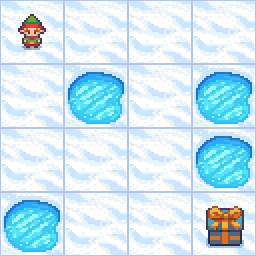

In [14]:
display(Image(filename='frozen_lake.gif'))